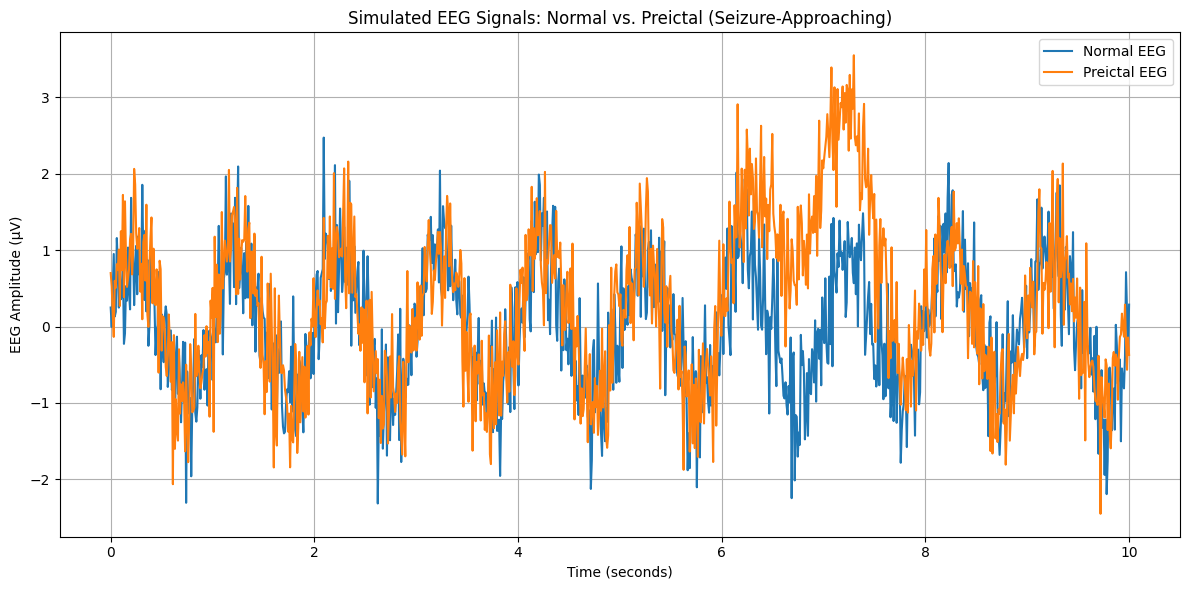

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate a time vector (10 seconds sampled at 100 Hz)
time = np.linspace(0, 10, 1000)

# Generate synthetic "normal" EEG signal
# Base sine wave at 1 Hz with added Gaussian noise
normal_signal = np.sin(2 * np.pi * 1 * time) + 0.5 * np.random.randn(1000)

# Generate synthetic "preictal" (before seizure) EEG signal
# Similar sine wave with a Gaussian spike added at ~7s to simulate seizure onset
preictal_signal = (
    np.sin(2 * np.pi * 1 * time)
    + 2 * np.exp(-((time - 7) ** 2) / 0.5)
    + 0.5 * np.random.randn(1000)
)

# Create a DataFrame for organized plotting
df = pd.DataFrame({
    'Time (s)': time,
    'Normal': normal_signal,
    'Preictal': preictal_signal
})

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the normal and preictal EEG signals
sns.lineplot(x='Time (s)', y='Normal', data=df, label='Normal EEG')
sns.lineplot(x='Time (s)', y='Preictal', data=df, label='Preictal EEG')

# Add titles and axis labels
plt.title('Simulated EEG Signals: Normal vs. Preictal (Seizure-Approaching)')
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Amplitude (μV)')

# Display legend and grid
plt.legend()
plt.grid(True)

# Format layout and display
plt.tight_layout()
plt.show()


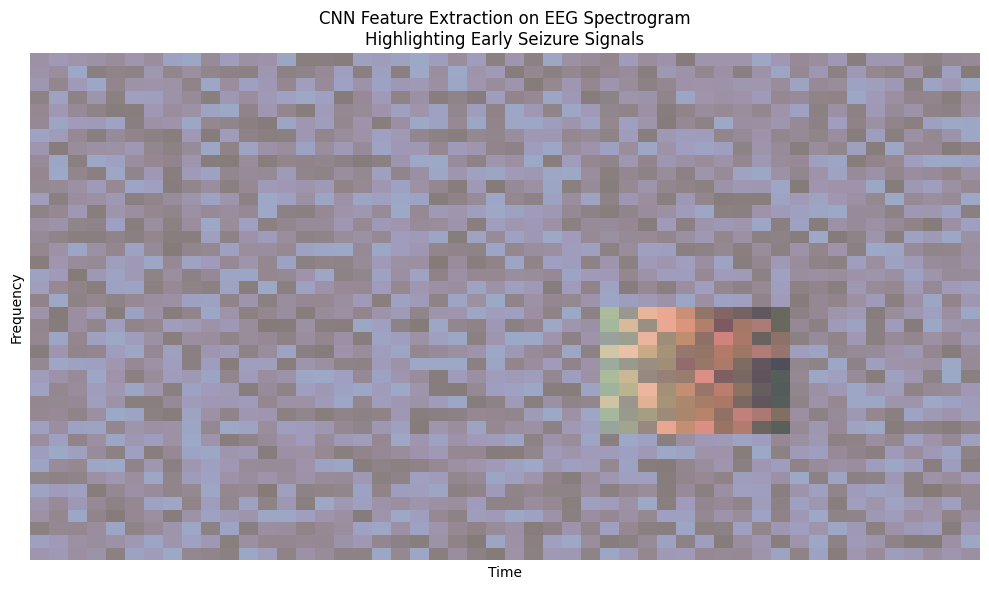

In [2]:
# 📌 CNN Attention Visualization over EEG Spectrogram

# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 2: Create synthetic EEG spectrogram data
np.random.seed(0)
time_bins = 50   # Number of time segments (X-axis)
freq_bins = 40   # Number of frequency bands (Y-axis)

# Simulate random EEG spectrogram baseline
spectrogram = np.random.rand(freq_bins, time_bins)

# Inject a "seizure hotspot" — increased energy in part of the spectrogram
spectrogram[20:30, 30:40] += 1.5  # Simulates preictal brainwave activity

# Step 3: Simulate CNN attention (where the model focuses)
cnn_attention = np.zeros((freq_bins, time_bins))

# Add attention overlay focused on the seizure-prone zone
# Gradient effect for realism: stronger attention near seizure onset
cnn_attention[20:30, 30:40] = np.linspace(0.3, 1.0, 10).reshape(1, -1)

# Step 4: Plot the spectrogram with CNN heatmap overlay
plt.figure(figsize=(10, 6))

# Plot base spectrogram
sns.heatmap(spectrogram, cmap="mako", cbar=False, xticklabels=False, yticklabels=False)

# Overlay CNN attention in red with transparency
sns.heatmap(cnn_attention, cmap="Reds", alpha=0.5, cbar=False, xticklabels=False, yticklabels=False)

# Step 5: Annotate plot
plt.title('CNN Feature Extraction on EEG Spectrogram\nHighlighting Early Seizure Signals')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()

# Display final image
plt.show()


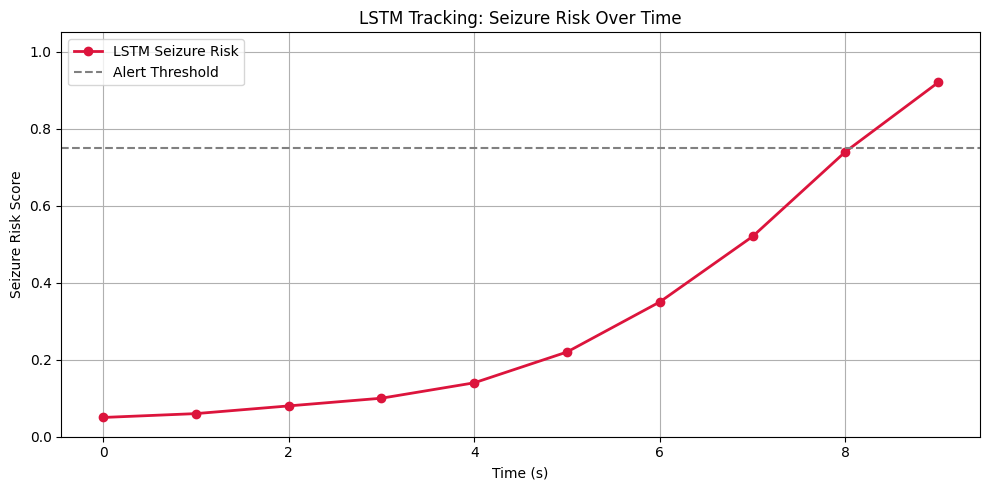

In [3]:
# LSTM Time-Series Risk Tracking Visualization

# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Simulate time segments leading up to a seizure
time_segments = np.arange(0, 10)  # e.g., last 10 seconds before predicted seizure

# Step 3: Simulate LSTM seizure risk score at each time step
# These values climb as the brain gets closer to seizure
seizure_risk = np.array([0.05, 0.06, 0.08, 0.1, 0.14, 0.22, 0.35, 0.52, 0.74, 0.92])

# Step 4: Plot the LSTM output trend
plt.figure(figsize=(10, 5))
plt.plot(time_segments, seizure_risk, marker='o', linewidth=2, color='crimson', label='LSTM Seizure Risk')

# Add threshold line for alert level
plt.axhline(0.75, color='gray', linestyle='--', label='Alert Threshold')

# Step 5: Add labels and title
plt.title("LSTM Tracking: Seizure Risk Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Seizure Risk Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Step 6: Display the plot
plt.show()


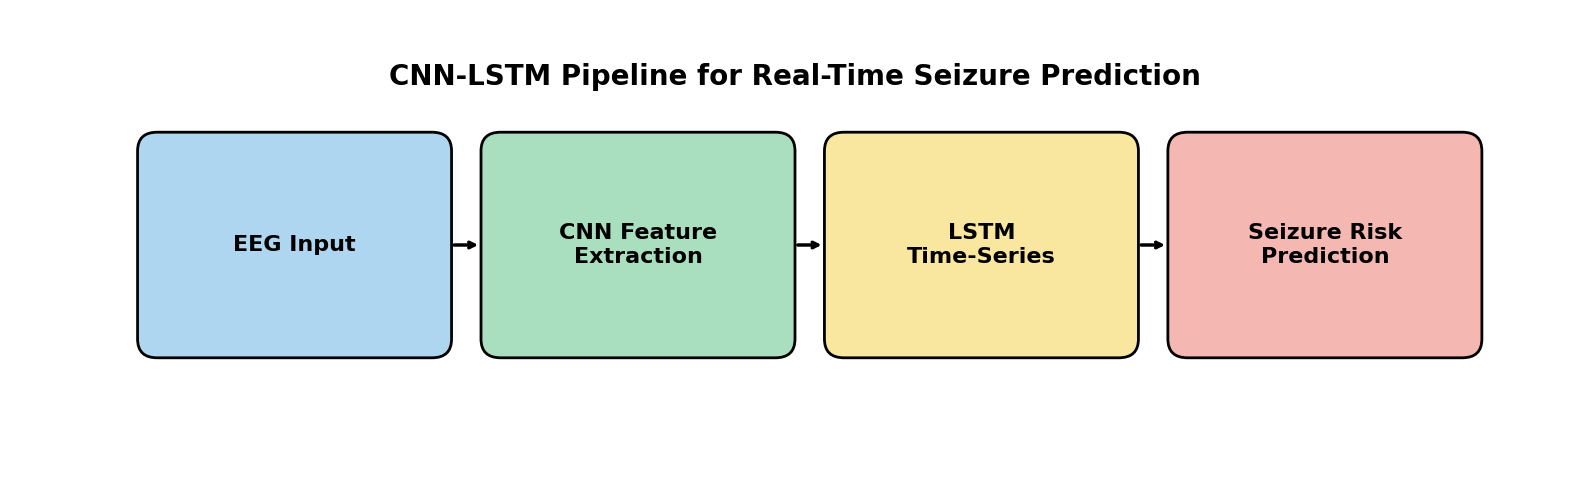

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16, 5), dpi=100)
ax.axis('off')

# Block spacing (manual fix)
block_width = 2.8
x_positions = [0, 3.5, 7.0, 10.5]

# Function to draw blocks
def draw_block(label, x, color):
    rect = patches.FancyBboxPatch((x+0.5, 1.5), block_width, 2.0,
                                   boxstyle="round,pad=0.2",
                                   edgecolor='black',
                                   facecolor=color,
                                   linewidth=2)
    ax.add_patch(rect)
    ax.text(x + block_width/2 + 0.5, 2.5, label, ha='center', va='center', fontsize=16, weight='bold')

# Draw each stage
draw_block("EEG Input", x_positions[0], '#AED6F1')
draw_block("CNN Feature\nExtraction", x_positions[1], '#A9DFBF')
draw_block("LSTM\nTime-Series", x_positions[2], '#F9E79F')
draw_block("Seizure Risk\nPrediction", x_positions[3], '#F5B7B1')

# Draw arrows between them
for i in range(len(x_positions) - 1):
    start = x_positions[i] + block_width+0.5
    end = x_positions[i + 1]+0.5
    ax.annotate('', xy=(end - 0.2, 2.5), xytext=(start + 0.2, 2.5),
                arrowprops=dict(facecolor='black', arrowstyle='->', lw=2.5))

# Title at the top
plt.text(7, 4.2, "CNN-LSTM Pipeline for Real-Time Seizure Prediction",
         fontsize=20, weight='bold', ha='center')

plt.xlim(-1, 15)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()
